In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
pd.options.mode.chained_assignment = None

In [7]:
df=pd.read_csv('Nbeats_2/final_logs.csv')
df['datetime']=pd.to_datetime(df['datetime'])

In [8]:
df.rename(columns={'signal':'signals'},inplace=True)

# Engine

In [9]:
signal=df[df['signals']!=0]
returns=[]
trade_time=[]

for i in range(0,len(signal),2):
    if signal['signals'].iloc[i]==1: #long position
        entry=signal['open'].iloc[i]
        exit=signal['open'].iloc[i+1]
        returns.append((exit-entry)/entry)
        trade_time.append(signal['datetime'].iloc[i+1]-signal['datetime'].iloc[i])
    else:
        entry=signal['open'].iloc[i]
        exit=signal['open'].iloc[i+1]
        returns.append((entry-exit)/entry)
        trade_time.append(signal['datetime'].iloc[i+1]-signal['datetime'].iloc[i])
        
trade_time=np.array(trade_time)
returns=np.array(returns)
returns_2=0.998+returns
portfolio=[1000]

for i in returns_2:
    portfolio.append(portfolio[-1]*i)
    
max_drawdown=0
peak_portfolio=1000
for i in portfolio:
    if i > peak_portfolio:
        peak_portfolio=i
    else:
        drawdown=(peak_portfolio-i)/peak_portfolio
        max_drawdown=max(drawdown,max_drawdown)
pnl=[]
for i in range(1,len(portfolio)):
    pnl.append(portfolio[i]-portfolio[i-1])
    
pnl=np.array(pnl)
pnl_loss=pnl[pnl<0]
pnl_profit=pnl[pnl>=0]
benchmark=1000*(0.998+(signal['close'].iloc[-1]-signal['open'].iloc[0])/signal['open'].iloc[0])

print(f"Average holding time: {np.mean(trade_time)}")
print(f"Average Returns: {np.mean(pnl)}")
print(f"Average Profit: {np.mean(pnl_profit)}")
print(f"Average Loss: {np.mean(pnl_loss)}")
print(f"Max holding time: {np.max(trade_time)}")
print(f"Maximum Profit: {np.max(pnl)}")
print(f"Maximum Loss: {np.min(pnl)}")
print(f"Number of trades: {len(returns)}")
print(f"Number of wins: {len(pnl_profit)}")
print(f"Number of losses: {len(pnl_loss)}")
print(f"% wins are : {100*len(pnl_profit)/len(returns)}")
print(f'intial portfolio value: 1000')
print(f'final portfolio value: {portfolio[-1]}')
print(f'benchmark portfolio value: {benchmark}')
print(f"Peak portfolio Value: {max(portfolio)}")
print(f"lowest portfolio Value: {min(portfolio)}")
print(f"max drawdown: {max_drawdown*100}")
print(f"From: {signal['datetime'].iloc[0]}")
print(f"From: {signal['datetime'].iloc[-1]}")

Average holding time: 0 days 00:57:00
Average Returns: 46.32715991316391
Average Profit: 117.82310265554162
Average Loss: -99.02173467298859
Max holding time: 0 days 00:57:00
Maximum Profit: 777.1853891510091
Maximum Loss: -869.3264193863888
Number of trades: 276
Number of wins: 185
Number of losses: 91
% wins are : 67.02898550724638
intial portfolio value: 1000
final portfolio value: 13786.29613603324
benchmark portfolio value: 3255.8840842559675
Peak portfolio Value: 16027.419487369812
lowest portfolio Value: 994.4740484309757
max drawdown: 16.122920384927916
From: 2018-01-03 15:30:00
From: 2021-12-04 13:27:00


<Axes: >

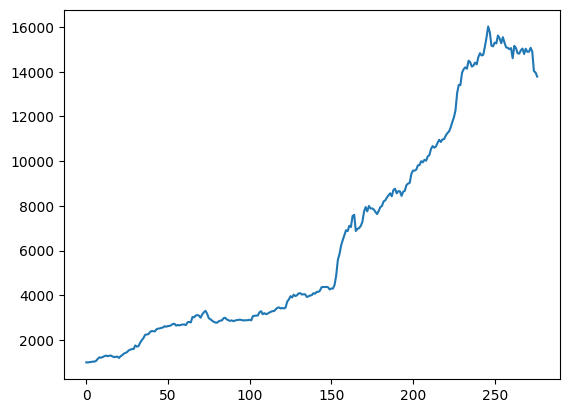

In [10]:
sns.lineplot(portfolio)

In [11]:
pd.Series(returns_2).describe()

count    276.000000
mean       1.009889
std        0.026310
min        0.904569
25%        0.995340
50%        1.006792
75%        1.020669
max        1.140025
dtype: float64